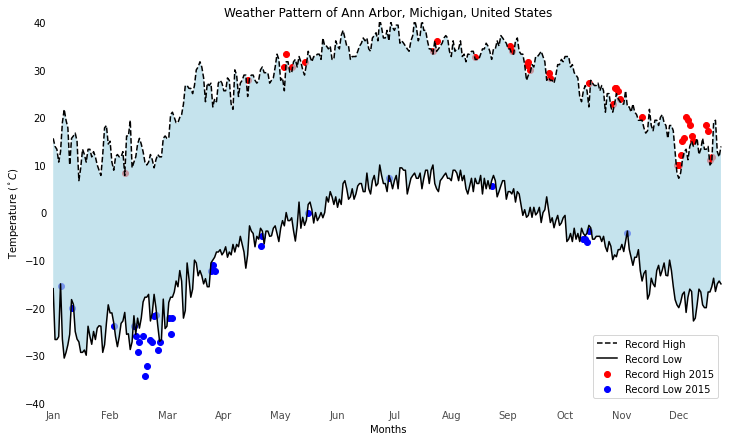

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")

df1 = pd.read_csv("BinSize_d400.csv")

df1 = df1[df1["hash"] == "fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89"]

newdf  = pd.merge(df1[["ID","NAME"]],df,on = "ID",how = "left")

newdf["Data_Value"] = newdf["Data_Value"].apply(lambda x: x/10)

newdf["Date"] = newdf["Date"].astype("datetime64[ns]")

dfmax = newdf[newdf["Element"] == "TMAX"]

dfmin = newdf[newdf["Element"] == "TMIN"]

dfmax = dfmax.groupby([dfmax["Date"].dt.year,dfmax["Date"].dt.month,dfmax["Date"].dt.day])["Data_Value"].agg(np.max).to_frame()

dfmin = dfmin.groupby([dfmin["Date"].dt.year,dfmin["Date"].dt.month,dfmin["Date"].dt.day])["Data_Value"].agg(np.min).to_frame()

dfmin.index.names = ["Year","Month","Day"]

dfmax.index.names = ["Year","Month","Day"]

dfmax= dfmax.reset_index()

dfmin = dfmin.reset_index()

dfmax_2014 = dfmax[dfmax["Year"] < 2015]

dfmax_2015 = dfmax[dfmax["Year"]>=2015]

dfmin_2014 = dfmin[dfmin["Year"] < 2015]

dfmin_2015 = dfmin[dfmin["Year"] >= 2015]

### dfmin_2014,dfmax_2014,dfmin_2015,dfmax_2015

#clear 29feb from leap year
tempmin = dfmin_2014[(dfmin_2014["Month"] == 2) & (dfmin_2014["Day"] == 29)]
tempmax = dfmax_2014[(dfmin_2014["Month"] == 2) & (dfmin_2014["Day"] == 29)]

dfmin_2014 = dfmin_2014.drop(tempmin.index,axis = 0)

dfmax_2014 = dfmax_2014.drop(tempmax.index,axis = 0)

dfmax_2014 = dfmax_2014.groupby(["Month","Day"]).agg({"Data_Value":np.max})


dfmin_2014 = dfmin_2014.groupby(["Month","Day"])["Data_Value"].agg(np.min).to_frame()

dfmax_2015 = dfmax_2015.groupby(["Month","Day"])["Data_Value"].agg(np.max).to_frame()

dfmin_2015 = dfmin_2015.groupby(["Month","Day"])["Data_Value"].agg(np.min).to_frame()

record_max = dfmax_2014["Data_Value"]
record_low = dfmin_2014["Data_Value"]
record_2015max = dfmax_2015["Data_Value"]
record_2015min = dfmin_2015["Data_Value"]

rmax = record_2015max[record_2015max > record_max]

rmin = record_2015min[record_2015min < record_low]

plt.figure(figsize = (12,7))
plt.plot(np.arange(0,365),record_max,"--k",label = "Record High")
plt.plot(np.arange(0,365),record_low,"-k",label = "Record Low")
plt.scatter(np.where(record_2015max > record_max),rmax,c = "r",label = "Record High 2015")
plt.scatter(np.where(record_2015min < record_low),rmin,c = "b",label = "Record Low 2015")
plt.xticks(np.arange(0,365,31),["Jan","Feb","Mar",'Apr',"May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],alpha = 0.7)
ax = plt.gca()
ax.axis([0,365,-40,40])
ax.fill_between(np.arange(len(record_max)),record_max,record_low,facecolor = "lightblue",alpha = 0.7)
plt.title("Weather Pattern of Ann Arbor, Michigan, United States")
plt.ylabel("Temperature ($^\circ C$)")
plt.xlabel("Months")
ax.legend(loc = 4)
plt.tick_params(top = False,right = False,left = False,bottom = False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.savefig("Weather.png",bbox_inches = "tight")